# Task 1: - Data analysis and ML Classifier

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

This bank marketing dataset is open-sourced and available for download at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#).

It was originally created by: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Data Exploration

In [2]:
bank_full = pd.read_csv('train.csv')
bank_full.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Variable Analysis

In [4]:
# data exploration
bank_full.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002697,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


<IPython.core.display.Javascript object>


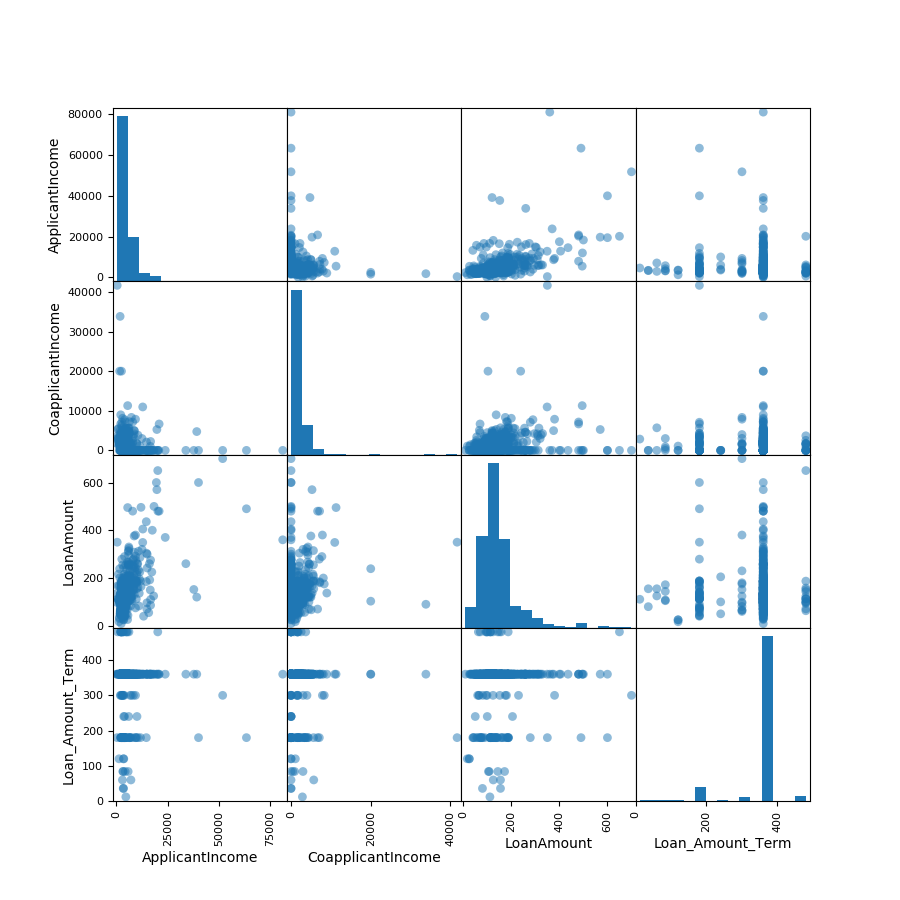

In [5]:
# plotting a scatter matrix
from matplotlib import cm

X_con = bank_full[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
y_con = bank_full['Loan_Status']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_con, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [6]:
# naive classifier approving all loans will be correct 68.7% of the time (baseline)
bank_full.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## Data pre-processing

In [7]:
# clean data
bank_full['Dependents'] = bank_full['Dependents'].fillna(0).apply(lambda x: int(3) if x == '3+' else int(x))

In [8]:
# remove outliers

In [9]:
# impute missing values

# assume Female if Gender not entered
# assume Single if Married not entered 
# assume None if Dependents not entered 
# assume Self-employed if Self_Employed not entered 
# assume Bad if Credit History not entered 

In [10]:
# encode categorical features
bank_full['Is_Male'] = bank_full['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
bank_full['Is_Married'] = bank_full['Married'].apply(lambda x: 1 if x == 'Yes' else 0)
bank_full['Is_Family'] = bank_full['Dependents'].apply(lambda x: 1 if x > 0 else 0)
bank_full['Is_Graduate'] = bank_full['Education'].apply(lambda x: 1 if x == 'Graduate' else 0)
bank_full['Is_Employed'] = bank_full['Self_Employed'].apply(lambda x: 1 if x == 'No' else 0)
bank_full['Is_Good'] = bank_full['Credit_History'].apply(lambda x: 1 if x == 1.0 else 0)
bank_full['Is_Urban'] = bank_full['Property_Area'].apply(lambda x: 1 if x == 'Urban' else 0)
bank_full['Is_Semi'] = bank_full['Property_Area'].apply(lambda x: 1 if x == 'Semiurban' else 0)
bank_full['Is_Rural'] = bank_full['Property_Area'].apply(lambda x: 1 if x == 'Rural' else 0)
bank_full['Is_Approved'] = bank_full['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

bank_full.head()
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Is_Male            614 non-null    int64  
 14  Is_Married         614 non-null    int64  
 15  Is_Family          614 non-null    int64  
 16  Is_Graduate        614 non

## Modelling

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

/Users/malcom/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
# training and test sets
X = bank_full.iloc[:,13:22].values
y = bank_full.iloc[:,22].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
X_train

array([[1, 1, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [13]:
# standardization
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/Users/malcom/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
# training and cross-validation
#clf = LogisticRegression()
#clf = KNeighborsClassifier(n_neighbors = 5)
clf = SVC(kernel = 'rbf')
#clf = DecisionTreeClassifier(max_depth=3)
#clf = GaussianNB()
#clf = RandomForestClassifier(n_estimators=10, random_state=7, max_depth=3)
#clf = GradientBoostingClassifier(random_state=7)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
new_user = np.array([1, 1, 1, 1, 1, 1, 0, 0, 1]).reshape(1,-1)
y_pred = clf.predict(X_test)

y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [16]:
accuracy_score(y_test, y_pred)

0.7792207792207793

In [17]:
confusion_matrix(y_test, y_pred)

array([[32, 24],
       [10, 88]])

In [18]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.57      0.65        56
          1       0.79      0.90      0.84        98

avg / total       0.78      0.78      0.77       154



In [19]:
file = './models/clf.sav'
fhand = open(file, 'wb')
pickle.dump(clf, fhand)